In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.DataFrame.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of unique mice.

unique_mice = merged_data["Mouse ID"].nunique()

unique_mice

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df = merged_data[merged_data.duplicated(subset=['Mouse ID','Timepoint'])]
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate = merged_data.loc[merged_data['Mouse ID'] == "g989"]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data[merged_data['Mouse ID'] != "g989"]
cleaned_df

#not dropping duplicates for this question
#cleaned_df = merged_data.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = "last", inplace = False)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
unique_mice2 = cleaned_df["Mouse ID"].nunique()

unique_mice2

248

In [ ]:
#SUMMARY STATS

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

# get only necessary info
use_df = cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]

# group by drug
grouped_df = use_df.groupby("Drug Regimen")

# get required info for each drug
mean_df = grouped_df.mean()
median_df = grouped_df.median()
variance_df = grouped_df.var()
stdev_df = grouped_df.std()
sem_df = grouped_df.sem()

# merge all info into one dataframe and rename columns
mean_median = pd.DataFrame.merge(mean_df, median_df, on="Drug Regimen")
variance_stdev = pd.DataFrame.merge(variance_df, stdev_df, on="Drug Regimen")
almost_all = pd.DataFrame.merge(mean_median, variance_stdev, on="Drug Regimen")
almost_all = almost_all.rename(columns={"Tumor Volume (mm3)_x_x":"Mean","Tumor Volume (mm3)_y_x":"Median","Tumor Volume (mm3)_x_y":"Variance","Tumor Volume (mm3)_y_y":"St. Dev."})
complete_df = pd.DataFrame.merge(almost_all, sem_df, on="Drug Regimen")
complete_df = complete_df.rename(columns={"Tumor Volume (mm3)":"SEM"})

complete_df


,Mean,Median,Variance,St. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

agg = cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])
# Using the aggregation method, produce the same summary statistics in a single line
agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [ ]:
#BAR AND PIE CHARTS

Text(0.5, 1.0, 'Number of Mice for Each Drug')

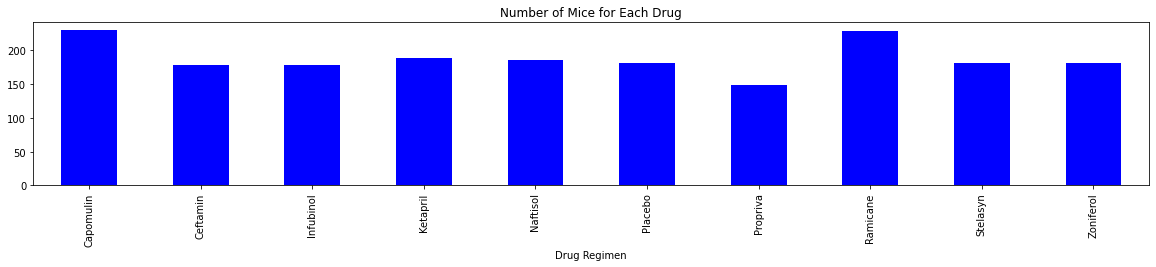

In [91]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#unique_df = cleaned_df.drop_duplicates(subset = ["Mouse ID","Drug Regimen"], keep = "first", inplace = False)

# create dataframe of count by each drug
bar_df = cleaned_df.groupby("Drug Regimen").count()
# only keep one column (besides index)
bar_df= bar_df["Mouse ID"]

# create graph
bar_df.plot(kind="bar", color = "blue", figsize=(20,3))
plt.title("Number of Mice for Each Drug")


Text(0.5, 1.0, 'Number of Mice for Each Drug')

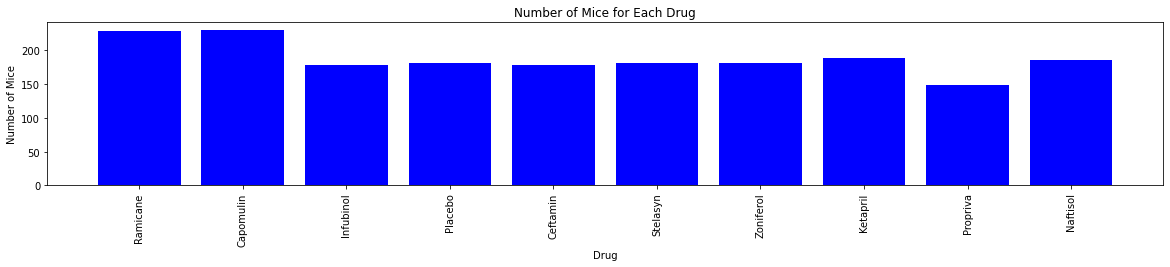

In [32]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#unique1_df = cleaned_df.drop_duplicates(subset = ["Mouse ID","Drug Regimen"], keep = "first", inplace = False)

# get list of drugs
drugs = cleaned_df["Drug Regimen"].unique()

# get only one column
unique1_df = cleaned_df["Drug Regimen"]

#setup variables
count = 0 
values = []

# start for loop - go through each drug
for drug in drugs:
    # go through the dataframe
    for row in unique1_df:
        # count how many times each drug is in column
        if row == drug:
            count = count + 1
    #add final count to list
    values.append(count)
    #reset count for next drug
    count = 0

#x-axis: drugs // y_axis = values

#set up bar graph
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, values, color='blue', align="center")
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.xlabel('Drug')
plt.ylabel('Number of Mice')
plt.title("Number of Mice for Each Drug")

Text(0.5, 1.0, 'Breakdown of Gender')

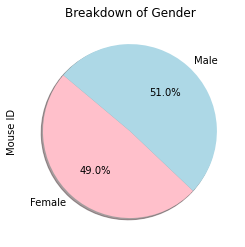

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#unique1_df = cleaned_df.drop_duplicates(subset = ["Mouse ID"], keep = "first", inplace = False)

# use only two columns of original dataframe and group by gender and get counts for each
pie_df = cleaned_df[["Sex", "Mouse ID"]].groupby("Sex").count()

# set colors
colors = ["pink","lightblue"]

# graph counts
pie_df.plot(kind="pie", subplots=True, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, legend=False)
plt.title("Breakdown of Gender")

Text(0.5, 1.0, 'Breakdown of Gender')

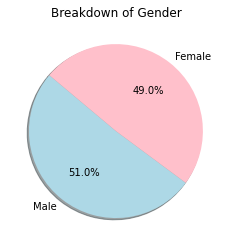

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#unique1_df = cleaned_df.drop_duplicates(subset = ["Mouse ID"], keep = "first", inplace = False)
# did not have to drop

# get list of genders
genders = cleaned_df["Sex"].unique()

# get only one column in dataframe
gender_df = cleaned_df["Sex"]

# set up variables
count = 0 
values = []

# start for loop - go through each gender
for gender in genders:
    # go through every row in data frame
    for row in gender_df:
        # count how many of each gender
        if row == gender:
            count = count + 1
    #add count to list
    values.append(count)
    #reset count for next gender
    count = 0

# set up colors
colors = ["lightblue","pink"]

# print graph
plt.pie(values, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Breakdown of Gender")

In [37]:
#QUARTILES, OUTLIERS, AND BOXPLOTS
last_df = cleaned_df.drop_duplicates(subset = ["Mouse ID"], keep = "last", inplace = False)

last_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# drop duplicates of each mouse but keep the last one (the last time stamp)
last_df = cleaned_df.drop_duplicates(subset = ["Mouse ID"], keep = "last", inplace = False)

#create new data frame only using four drugs mentioned
last_df = last_df[(last_df["Drug Regimen"] == "Capomulin") | (last_df["Drug Regimen"] == "Ramicane") | (last_df["Drug Regimen"] == "Infubinol") |  (last_df["Drug Regimen"] == "Ceftamin")]



In [81]:
# Put treatments into a list for for loop (and later for plot labels)
# get unique drugs in new dataframe (the four asked for)
drugs = last_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

#start for loop through four regimens
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    last = last_df.loc[last_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    
    #take series from above and append to empty list
    
    tumor_vol.append(last) 
    
    # Determine outliers using upper and lower bounds
    # find quartiles and iqr
    quartiles = last.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # print info
    print(drug)
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
    
    # find and print bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # check for outliers
    for x in last:
        if (x > upper_bound) | (x < lower_bound):
            print(f"{drug} has an outlier at {x}")
    
    print("-------------------------------------------------------")
        
    
    

Ramicane
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------------------
Capomulin
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------------------
Infubinol
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999

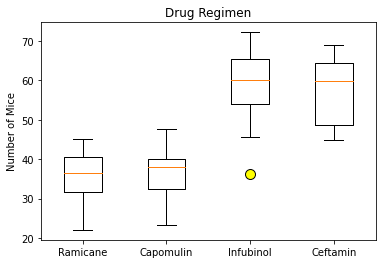

In [86]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Number of Mice')

#change outlier color
flierprops = dict(marker='o', markerfacecolor='yellow', markersize=10,
                  linestyle='none', markeredgecolor='black')

# print graph
ax1.boxplot(tumor_vol,labels=drugs,flierprops=flierprops)     
plt.show()

In [ ]:
#LINE AND SCATTER PLOTS

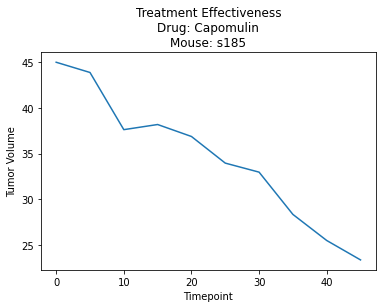

In [94]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# get only Capomulin data in a dataframe
drug_df = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

# after running it, choose one mouse to graph
mouse = "s185"

# create dataframe of only chosen mouse
mouse_df = drug_df.loc[drug_df['Mouse ID'] == mouse]

# set axes
x_axis = mouse_df["Timepoint"]
y_axis = mouse_df["Tumor Volume (mm3)"]

# print graph
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title("Treatment Effectiveness\nDrug: Capomulin\nMouse: s185")
plt.show()

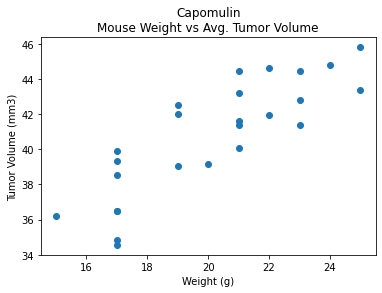

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# get only Capomulin data in a dataframe
drug_df = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

# group by mouse to get average tumor volume for each mouse and its weight
cor_df = drug_df.groupby("Mouse ID").mean()

#set axes
x_values = cor_df['Weight (g)']
y_values = cor_df['Tumor Volume (mm3)']

#print graph
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin\nMouse Weight vs Avg. Tumor Volume")
plt.show()

In [ ]:
#CORRELATION AND REGRESSION

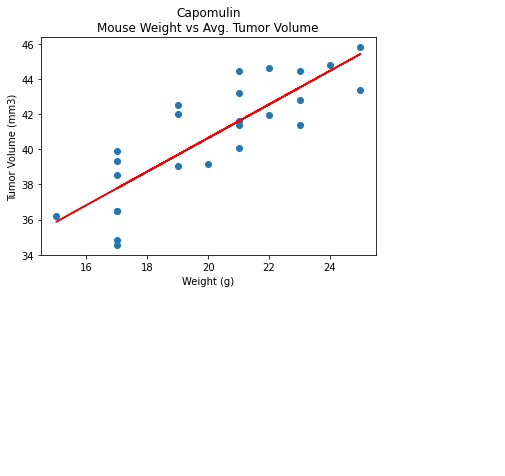

The equation of linear regession is: y = 0.95x + 21.55
The correlation coefficient is: 0.8419363424694718


In [96]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# get only Capomulin data in a dataframe
drug_df = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

# group by mouse to get average tumor volume for each mouse and its weight
cor_df = drug_df.groupby("Mouse ID").mean()

# set axes
x_values = cor_df['Weight (g)']
y_values = cor_df['Tumor Volume (mm3)']

# get values for slope, intercept, etc. and use to calculate regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print graph with regression model
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,22),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin\nMouse Weight vs Avg. Tumor Volume")
plt.show()
print(f"The equation of linear regession is: {line_eq}")
print(f"The correlation coefficient is: {rvalue}")